In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

#### **Pesos**

In [3]:
# Define a semente para reprodutibilidade
np.random.seed(42)

# Criando dois cromossomos com 180 pesos no intervalo [-1, 1]
geracao = np.random.uniform(-1, 1, (3, 180))

# Criando uma nova coluna de zeros
nova_coluna = np.zeros((geracao.shape[0], 1))

# Concatenando verticalmente a coluna da geracao com a coluna de zeros
geracao = np.hstack((geracao, nova_coluna))

geracao

array([[-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
        -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516,
        -0.95883101,  0.9398197 ,  0.66488528, -0.57532178, -0.63635007,
        -0.63319098, -0.39151551,  0.04951286, -0.13610996, -0.41754172,
         0.22370579, -0.72101228, -0.4157107 , -0.26727631, -0.08786003,
         0.57035192, -0.60065244,  0.02846888,  0.18482914, -0.90709917,
         0.2150897 , -0.65895175, -0.86989681,  0.89777107,  0.93126407,
         0.6167947 , -0.39077246, -0.80465577,  0.36846605, -0.11969501,
        -0.75592353, -0.00964618, -0.93122296,  0.8186408 , -0.48244004,
         0.32504457, -0.37657785,  0.04013604,  0.09342056, -0.63029109,
         0.93916926,  0.55026565,  0.87899788,  0.7896547 ,  0.19579996,
         0.84374847, -0.823015  , -0.60803428, -0.90954542, -0.34933934,
        -0.22264542, -0.45730194,  0.65747502, -0.28649335, -0.43813098,
         0.08539217, -0.71815155,  0.60439396, -0.8

#### **Clase Neurônio**

In [4]:
class Neuronio:
    def __init__(self,array_entrada = None,array_pesos = None):
        self.entrada = array_entrada
        self.pesos = array_pesos
    
    ## Usando sigmóide na função de ativacao
    def ativacao(self,soma):
        return 1 /(1 + np.exp(-soma))
    
    def set_entrada(self,entrada):
        self.entrada = entrada
    
    def propagation(self,entrada):
        
        self.set_entrada(entrada)
        # entrada recebendo o valor de entrada para que possa ser alterado
        entrada =  self.entrada.copy()

        # Incluindo um valor 1 no inicío do array da entrada por causa do peso bias
        entrada = np.insert(entrada, 0, 1)
        # print(f"Entrada : {entrada} Tamanho:{len(entrada)}")
        # print(f"Pesos : {self.pesos} Tamanho:{len(self.pesos)}")
        # print("entrada=",entrada)

        soma = 0
        
        # Verifica se os pesos e a entrada tem o mesmo len
        if len(self.pesos) != len(entrada):
            raise ValueError("O número de pesos deve ser igual ao número de entradas, incluindo o bias.")

        # Calculo de soma ponderada a partir do produto escalar entre os vetores de pesos e entrada
        soma = np.dot(entrada, self.pesos)
        # print("soma=",soma)
        
        #     # Obtendo y a partir da função de ativação
        y = self.ativacao(soma)
        # print("y=",y)
        return y
    
    def get_pesos(self):
        return self.pesos

    def __str__(self) -> str:
        return "Entrada atual: "+ str(self.entrada) + "\nPesos atuais:" + str(self.pesos)

#### **Classe Rede**

In [56]:
class Rede:    
    def __init__(self,entrada = None,array_pesos= None):
        self.entrada = entrada
        self.pesos = None
        self.oculta = []
        self.saida = []
        self.pesos_oculta = None
        self.pesos_saida = None
        self.y_oculta = []
        self.y_saida = []
        
        self.populacao = array_pesos
        self.populacao_intermediaria = None
        
        self.cromossomo = 0 # Variável para controlar qual cromossomo da população será fatiado
        
        # Condicional para garantir que os pesos vão ser fatiados e distribuídos nas camadas de entrada e saída
        if self.pesos_oculta is None and self.pesos_saida is None:
            self.slice_pesos()
         
        # Setando os pesos da camada oculta
        self.prepara_oculta()
        
        # Setando os pesos da camada de saída
        self.prepara_saida()
        
    # Função para fazer o fatiamento dos pesos
    def slice_pesos(self):        
        # Dividindo o array pela metade (90 colunas em cada metade)
        # metade_oculta, metade_saida = np.hsplit(self.populacao[self.cromossomo], 2)
        metade_oculta, metade_saida = np.hsplit(self.populacao[self.cromossomo][:180], 2)

        # Dividindo cada metade em 9 blocos de 10 colunas
        self.pesos_oculta = np.hsplit(metade_oculta, 9)
        self.pesos_saida = np.hsplit(metade_saida, 9)
        # print(f"Pesos Camada oculta: {self.pesos_oculta}")
        # print(f"Pesos Camada saida: {self.pesos_saida}")

        

    # Função para setar a camada oculta
    def prepara_oculta(self):
            
        # Criação da camada oculta instanciando os neurônios com os pesos
        for i in range(len(self.pesos_oculta)):  # Itera sobre os pesos disponíveis
            self.oculta.append(Neuronio(array_pesos=self.pesos_oculta[i]))
            
    # Função para setar a camada de saida
    def prepara_saida(self):
                
        # Criação da camada oculta instanciando os neuronios com os pesos        
        for i in range(len(self.pesos_saida)):
            self.saida.append(Neuronio(array_pesos=self.pesos_saida[i]))
            
    # Função para obter os y a partir de uma entrada e a propagação dentro dos neuronios
    def set_camada_oculta(self,entrada):
        # Limpando o array y da oculta
        self.y_oculta = []
        # print(f"Entrada= {entrada} Tamanho = {len(entrada)}")
        # print(f"Pesos Oculta = {self.oculta} Tamnho = {len(self.oculta)}")
        # Adição dos retornos das propagações na lista de Y da camada oculta
        for i in range(len(self.pesos_oculta)):
            self.y_oculta.append(self.oculta[i].propagation(entrada))
            
    def set_camada_saida(self,entrada):
        # Limpando o array y da saída
        self.y_saida = []
        # Adição dos retornos das propagações na lista de Y da camada oculta
        for i in range(len(self.pesos_saida)):
            self.y_saida.append(self.saida[i].propagation(entrada))

    ### SETS
    # Função para setar os pesos
    def set_pesos(self,array_pesos):
        self.pesos = array_pesos
        
    # Função para setar a entrada
    def set_entrada(self,entrada):
        self.entrada = entrada
            

    # Função para obter a posição a partir da jogada informada
    def position(self,entrada):
        
        # Passando a entrada para a camada oculta
        self.set_camada_oculta(entrada)
        
        # Passando a entrada para a camada de saida
        self.set_camada_saida(self.get_oculta())
        
        # Retornando o index do maior valor do array da camada de saída
        return self.y_saida.index(max(self.y_saida))
    

    # Função para se obter o array com o maior aptidão
    def elitismo(self):
        return self.populacao[np.argmax(self.populacao[:, -1])]

    # Função que realiza a seleção de dois arrays aleatórios da população e retorna o array com a melhor aptidão entre eles
    def torneio(self):
        
        # Obtendo os arrays aleatórios
        array1 = self.populacao[np.random.randint(0, len(self.populacao))]
        print("Aptidão array1:",array1[-1])

        # Criação de um array nulo
        array2 = None
        
        # Criando um loop para que o array2 seja diferente do array1
        while np.array_equal(array1, array2) or array2 is None:
            array2 = self.populacao[np.random.randint(0, len(self.populacao))]
            print("Aptidão array2:",array2[-1])

        # Comparação entre as aptidões dos arrays 1 e 2
        if array1[-1] > array2[-1]:
            # print("Escolheu o array1")
            return array1
        else:
            # print("Escolheu o array2")
            return array2

    # Função para fazer o cruzamento entre os arrays selecionados via torneio
    def crossover(self):      
        # Obtendo os array1 via torneio
        array1 = self.torneio()
        
        # Criação de um array nulo
        array2 = None

        # Criando um loop para que o array2 seja diferente do array1
        while np.array_equal(array1, array2) or array2 is None:
            array2 = self.torneio()

        # Retornando a média arimética entre cada ponto dos dois arrays
        return (array1 + array2) / 2

    # Função para a criação da nova população a partir do elitismo e do torneio
    def popula_intermed(self):
        
        array_temp = np.zeros((len(self.populacao), 181))

        print(self.elitismo())
        array_temp[0] = self.elitismo()

        # Loop para preencher os outros cromossomos da população com o crossover
        for i in range(1,len(self.populacao)):
            # Atribuindo ao cromossomo o retorno da função crossover
            array_temp[i] = self.crossover()

            # Zerando o valor da última coluna
            array_temp[i][-1] = 0

        return array_temp
    
    # Função para realizar a mutação nos cromossomos da população após a subscrever
    def mutacao(self):
        # Taxa de mutação
        taxa = 0.35

        # Condicional para definir se a mutação ocorrerá ou não
        if np.random.uniform(0, 1) < taxa:
            # Loop para garantir que iremos alterar todos os cromossomos exceto o primeiro (elitismo)
            for i in range(1,len(self.populacao)):
                    # Seleção de uma coluna para realizar a mutação, descosiderando a última coluna
                    gene_index = np.random.randint(0, self.populacao.shape[1] - 1)

                    # Realização da mutação no index do cromossomo
                    self.populacao[i][gene_index] += np.random.uniform(-0.1, 0.1)
    
    def subscricao(self):
        # Substituindo a população atual pela população intermediária
        self.populacao = self.populacao_intermediaria

        # Zerando o índice de cromossomo
        self.cromossomo = 0

        # Chamando a função de mutação
        self.mutacao()

    # GUILHERME VELHO
    # Função heurística para atribuir uma nota no último valor array cromossomo que estava sendo usado
    # na partida
    def heuristica(self, status_jogo, jogadas_realizadas):
        invalid = -10
        win = 2
        loss = 1
        draw = 5

        if status_jogo == "O Venceu":
            nota = jogadas_realizadas * loss
        elif status_jogo == "X Venceu":
            nota = jogadas_realizadas * win
        elif status_jogo == "Empate":
            nota = jogadas_realizadas * draw
        else:
            nota = jogadas_realizadas * invalid

        cromossomoAtual = self.populacao[self.cromossomo]
        cromossomoAtual[-1] = nota
        self.cromossomo += 1

        print(nota)
        if self.cromossomo == len(self.populacao):
            self.populacao_intermediaria = self.popula_intermed()
            self.subscricao()
            print(self.populacao)

        self.slice_pesos()
        self.set_camada_oculta()
        self.set_camada_saida()

        # Finaliza a heurística modificando o valor do cromossomo para continuar percorrendo a população
        pass


    ### GETS
    # Função para obter os valores dos pesos
    def get_pesos(self):
        return self.pesos
    
    # Função para obter a camada oculta
    def get_oculta(self):
        return self.y_oculta
    
    # Função para obter a camada de saida
    def get_saida(self):
        return self.y_saida
    
    # Função para obter os pesos da camada oculta
    def get_pesos_oculta(self):
        return self.pesos_oculta
    
    # Função para obter os pesos da camada de saida
    def get_pesos_saida(self):
        return self.pesos_saida
    
    # Print da rede
    def __str__(self) -> str:
        return "Camada oculta: "+ str(self.y_oculta) + "\nCamada saida:" + str(self.y_saida)
    

In [6]:
# jogada = [1,0,0,0,-1,0,0,0,0]


# rede = Rede(array_pesos=geracao)

# print("Tabuleiro atual:",jogada)

# position = rede.position(jogada)
# print("Posição recomendada:",position)


# if jogada[position] == 0:
#     jogada[position] = 1
#     print("Jogada realizada: ",jogada)
# else:
#     print("Posição ocupada")

In [7]:
# cromossomo = 0

# valor = 5

# # for i in range(len(aux)):

# nota = heuristica(valor)

# aux[cromossomo,180] = nota

# aux

In [8]:
# # Função para se obter o array com o maior aptidão
# def elitismo(populacao):
#     return populacao[np.argmax(populacao[:, -1])]

# # Função torneio que realiza a seleção de dois arrays aleatórios da população e retorna o array com a melhor aptidão entre eles
# def torneio(populacao):
    
#     # Obtendo os arrays aleatórios
#     array1 = populacao[np.random.randint(0, len(populacao))]
#     # print("Aptidão array1:",array1[-1])

#     array2 = None
    
#     while np.array_equal(array1, array2) or array2 is None:
#         array2 = populacao[np.random.randint(0, len(populacao))]
#         # print("Aptidão array2:",array2[-1])

#     if array1[-1] > array2[-1]:
#         # print("Escolheu o array1")
#         return array1
#     else:
#         # print("Escolheu o array2")
#         return array2


# def crossover(populacao):
#     # Criando um array composto com zeros para preenche-lo
#     array_retorno = np.zeros(181)
    
#     # Obtendo os array1 via torneio
#     array1 = torneio(populacao)
    
#     array2 = None

#     # Criando um loop para que o array2 seja diferente do array1
#     while np.array_equal(array1, array2) or array2 is None:
#         array2 = torneio(populacao)

#     array_retorno = (array1 + array2) / 2

#     return array_retorno


# def popula_intermed(populacao):
    
#     array_temp = np.zeros((len(populacao), 181))

#     array_temp[0] = elitismo(populacao)

#     for i in range(1,len(populacao)):
#         array_temp[i] = crossover(populacao)

#     array_temp[:,-1] = 0

#     return array_temp

In [9]:
# # Define a semente para reprodutibilidade
# np.random.seed(42)

# # Criando dois cromossomos com 180 pesos no intervalo [-1, 1]
# geracao0 = np.random.uniform(-1, 1, (50, 180))

# # Criando uma nova coluna de zeros
# nova_coluna = np.random.randint(0, 1000, size=(geracao0.shape[0], 1))

# # Concatenando verticalmente a coluna da população com a nova coluna
# geracao0 = np.hstack((geracao0, nova_coluna))

# print("Geração ZERO:")
# print(geracao0)

In [10]:
# # Colocando na última coluna de cada linha um valor inteiro aleatório entre 1 e 1000
# geracao0[:,-1] = np.random.randint(1,1000)

In [11]:
# print(geracao0[:,-1])

In [12]:
# geracao1 = popula_intermed(geracao0)
# # print(geracao1.shape)

In [13]:
# for i in range(len(geracao1)):
#     print(f"Index: {i} Linha: {geracao1[i]}")

#### **Funções para classificação de jogadas**

In [14]:
# Função para verificar se as linhas são iguais
def verif_linhas(tabuleiro):
    for i in range(0, 9, 3):
        # Verificando se todos os elementos da linha são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+1] == tabuleiro[i+2] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se as colunas são iguais
def verif_colunas(tabuleiro):
    for i in range(3):
        # Verificando se todos os elementos da coluna são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+3] == tabuleiro[i+6] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal principal é igual
def verif_diag_principal(tabuleiro):
    # Verificando se todos os elementos da diagonal principal são iguais exceto zero
    if tabuleiro[0] == tabuleiro[4] == tabuleiro[8] != 0:
        return str(tabuleiro[0])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal secundária é igual
def verif_diag_secundaria(tabuleiro):
    # Verificando se todos os elementos da diagonal secundária são iguais exceto zero
    if tabuleiro[2] == tabuleiro[4] == tabuleiro[6] != 0:
        return str(tabuleiro[2])  # Retornando o valor do ganhador: 1 ou -1
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

#### **Minimax**

import numpy as np
import math

#### Define os jogadores
USER = 1    # Jogador (usuário) representado como 1
AI = -1     # Computador representado como -1

class Node:
    def __init__(self, board, player, move=None):
        self.board = board.copy()
        self.player = player
        self.move = move  # A jogada (linha, coluna) que levou a este estado
        self.children = []
        self.score = None

    # Método para expandir o nó, gerando todos os possíveis movimentos
    def expand(self):
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == 0:
                    new_board = self.board.copy()
                    new_board[i, j] = self.player
                    child_node = Node(new_board, -self.player, (i, j))
                    self.children.append(child_node)
                    child_node.expand()

#### Função MiniMax usando árvore de estados
def minimax(node, depth, is_maximizing):
    winner = status_jogo(jogada)
    if winner == "O VENCEU!":
        return -10 + depth
    elif winner == "X VENCEU!":
        return 10 - depth
    elif "EMPATE":
        return 0

    # Se não for folha, calcula os scores dos filhos
    if is_maximizing:
        best_score = -math.inf
        for child in node.children:
            score = minimax(child, depth + 1, False)
            best_score = max(score, best_score)
        node.score = best_score
        return best_score
    else:
        best_score = math.inf
        for child in node.children:
            score = minimax(child, depth + 1, True)
            best_score = min(score, best_score)
        node.score = best_score
        return best_score

#### Função para encontrar a melhor jogada
def find_best_move(board):
    root = Node(board, AI)  # Cria o nó raiz com a jogada da IA
    root.expand()  # Expande a árvore a partir da raiz

    best_score = math.inf
    best_move = None
    for child in root.children:
        score = minimax(child, 0, True)  # Maximiza a jogada do usuário
        if score < best_score:
            best_score = score
            best_move = child.move

    return best_move

In [15]:
def check_winner(board):
    # Verifica se há um vencedor em linhas e colunas
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != 0:
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != 0:
            return board[0][i]
    
    # Verifica se há um vencedor nas diagonais
    if board[0][0] == board[1][1] == board[2][2] != 0:
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != 0:
        return board[0][2]
    
    return 0

def is_moves_left(board):
    for row in board:
        if 0 in row:
            return True
    return False

def miniMax(board, depth, isMax):
    result = check_winner(board)
    if result == 1:  # Jogador vence
        return 10 - depth
    elif result == -1:  # Computador vence
        return depth - 10
    elif not is_moves_left(board):  # Empate
        return 0
    
    if isMax:  # Jogador (Max)
        maxScore = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == 0:
                    board[i][j] = 1
                    score = miniMax(board, depth + 1, False)
                    board[i][j] = 0
                    maxScore = max(maxScore, score)
        return maxScore
    else:  # Computador (Min)
        minScore = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == 0:
                    board[i][j] = -1
                    score = miniMax(board, depth + 1, True)
                    board[i][j] = 0
                    minScore = min(minScore, score)
        return minScore

def bestMove(board):
    best_val = float('inf')
    best_move = (-1, -1)

    # Considerando todas as possibilidades, encontra a melhor jogada
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                board[i][j] = -1
                move_val = miniMax(board, 0, True)  # True indica que é a vez do jogador
                board[i][j] = 0
                if move_val < best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

#### **Funções para realização de jogadas**

In [16]:
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir da linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    print("Linha:", linha)
    print("Coluna:", coluna)

    # Verificar se o valor na posição especificada é igual a zero
    if jogada[indice] == 0:
        return True
    
    return False
    
# Função para realização da jogada do computador a partir de uma jogada aleatória
def jogada_Aleatoria(jogada):
    jogada_feita = False
    
    for i in range(3):
        for j in range(3):
            if jogada[i, j] == 0:
                jogada[i, j] = -1
                jogada_feita = True
                break
        if jogada_feita:
            break
        
    return jogada

# Função para utilização do Minimax para realização da jogada
def jogada_Minimax(jogada):
    # Usando Minimax para obter a melhor posição para realização da jogada
    posicao = bestMove(jogada)
    
    # Realização da jogada no tabuleiro
    jogada[posicao[0],posicao[1]] = -1
    
    return jogada


# Função para ajuste de jogadas
def ajuste_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir de linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    # Substituindo o valor da posição informada por 1
    jogada[indice] = 1

    return jogada

# Função para definir a dificuldade da partida
def set_dificuldade():
    valor_valido = False
    while not valor_valido: 
        dificuldade = input("Escolha o nível de dificuldade: [1]: FÁCIL\n[2]: MÉDIO\n[3]: DIFÍCIL")
        
        if not dificuldade.isnumeric():
            print("Valor precisa ser numérico!")
            continue
        
        if int(dificuldade) not in range(1,4):
            print("O valor deve ser 1, 2 ou 3")
            continue
        
        valor_valido = True
        break
        
    return int(dificuldade)

# Função para definir o acesso ao minimax 
def jogada_COM(jogada,dificuldade,jogou):
    ###
    # Dificuldade do jogo 
    # [1]: FÁCIL
    # [2]: MÉDIO
    # [3]: DIFÍCIL
    # 
    
    ifJogou = False
    
    # Caso seja fácil, se o valor aleatório for menor que 25% acessa o minimax
    if dificuldade == 1:
        if jogou == 4:
            jogada = jogada_Minimax(jogada)
            jogou = 0
            ifJogou = True
        else:
            jogada = jogada_Aleatoria(jogada)
    
    # Caso seja médio, se o valor aleatório for menor que 50% acessa o minimax
    elif dificuldade == 2:
        if jogou % 2 == 0:
            jogada = jogada_Minimax(jogada)
            ifJogou = True
        else:
            jogada = jogada_Aleatoria(jogada)
        
        if jogou == 4:
            jogou = 0
        
    
    # Caso seja difícil, sempre acessa o minimax
    elif dificuldade == 3:
        jogada = jogada_Minimax(jogada)
        ifJogou = True
        
    jogou+=1
    
    print(jogada)
    return jogada, ifJogou


### **Função para plotagem do tabuleiro**

In [17]:
import matplotlib.pyplot as plt

def plot_board(board,status=None,ifJogou=False):

    board = np.array(board).reshape(3, 3)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if status is not None:
        plt.text(1.5, -0.5, 'Status: ' + status, fontsize=42, ha='center', va='center', color='black')
    
    if ifJogou == True:
        plt.text(1.5, -1.25, 'MiniMax Jogou', fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


### **Partida Usuário x Minimax**

In [34]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogou = random.randint(1, 4)
plot_board(jogada)

finalizar_jogo = False

dificuldade = set_dificuldade()

while not finalizar_jogo:
    clear_output(wait=True)
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Posição já ocupada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = np.array(jogada).reshape(9,)

    # Obtenção do status do jogo após jogada do usuário
    status  = status_jogo(jogada)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True
        plot_board(jogada,status)
        break
    
    jogada = np.array(jogada).reshape(3,3)

    # Realização de jogada da máquina
    jogada, ifJogou = jogada_COM(jogada,dificuldade,jogou)
    jogou += 1

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,)

    # Obtenção do status do jogo após jogada da máquina
    status  = status_jogo(jogada)

    # Plotando o tabuleiro 
    plot_board(jogada,status,ifJogou)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True



ValueError: not enough values to unpack (expected 2, got 1)

### **Partida Rede x Minimax**

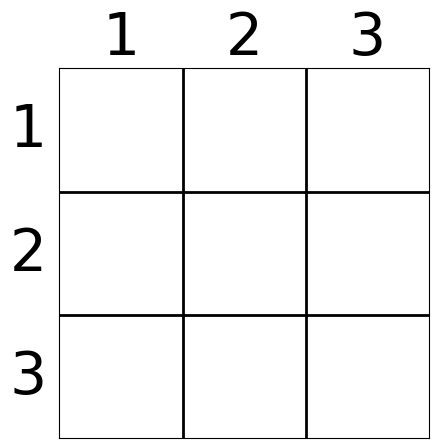

Posição recomendada pela rede: 6
Linha: 2
Coluna: 3


[[ 0  0 -1]
 [ 0  0  1]
 [ 0  0  0]]


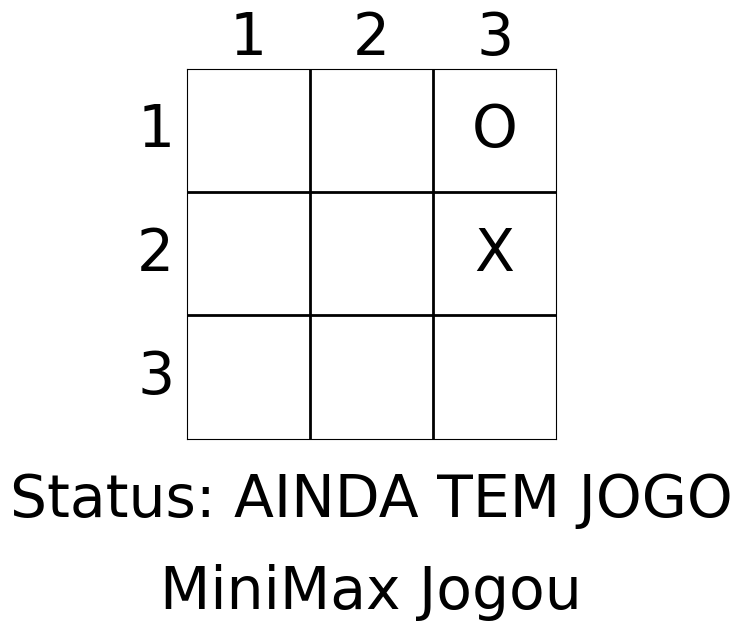

Posição recomendada pela rede: 6
Linha: 2
Coluna: 3
Jogada não realizada
-20


TypeError: Rede.set_camada_oculta() missing 1 required positional argument: 'entrada'

In [57]:
from IPython.display import clear_output


rede = Rede(array_pesos=geracao)

for i in range(1000):
    jogada = [0,0,0,0,0,0,0,0,0]
    jogou = random.randint(1, 4)
    jogadasRede = 0
    plot_board(jogada)

    finalizar_jogo = False

    dificuldade = 3

    while not finalizar_jogo:
        # Jogada da rede
        jogadaRede = rede.position(jogada)
        jogadasRede += 1
        print("Posição recomendada pela rede:", jogadaRede)
        linha = (jogadaRede -1) // 3 + 1
        coluna = (jogadaRede -1) % 3 + 1
        if valida_jogada(jogada, linha, coluna):
            jogada = ajuste_jogada(jogada, linha, coluna)
        else:
            print("Jogada não realizada")
            rede.heuristica("Invalida",jogadasRede)
            break

        # Verificar se o jogo terminou
        if status_jogo(jogada) != 'AINDA TEM JOGO':
            rede.heuristica(status,jogadasRede)
            finalizar_jogo = True
            break

        # Jogada do Minimax
        jogada = np.array(jogada).reshape(3,3)
        jogada, ifJogou = jogada_COM(jogada,dificuldade,jogou)
        jogou += 1

        # Redefinindo o shape do array para usar no classificador
        jogada = np.array(jogada).reshape(9,)

        # Obtenção do status do jogo após jogada da máquina
        status  = status_jogo(jogada)

        # Plotando o tabuleiro 
        plot_board(jogada,status,ifJogou)
        
        # Caso haja um vencedor o loop será encerrado
        if status_jogo(jogada) != "AINDA TEM JOGO":
            rede.heuristica(status,jogadasRede)
            finalizar_jogo = True
    print(jogada)

### **Partida Usuário x Rede**

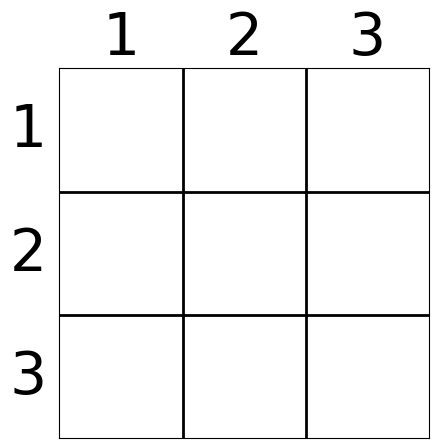

In [ ]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogou = random.randint(1, 4)
plot_board(jogada)

finalizar_jogo = False

dificuldade = set_dificuldade()

### **Codigos não mais utilizados, excluir antes de realizar a entrega**

In [ ]:
# class Rede:    
#     def __init__(self,entrada = None,array_pesos= None):
#         self.entrada = entrada
#         self.oculta = [None]*9
#         self.saida = [None]*9
#         self.pesos = array_pesos
        
#     # Função para fazer o fatiamento dos pesos
#     def slice_pesos(self):
#         sliced_pesos = []

#         # Para cada linha na lista de pesos percorre a linha adicionando a uma nova lista 10 elementos
#         for linha in self.pesos:
#             for i in range(0,len(linha),10):
#                 sliced_pesos.append(linha[i: i + 10])

#         return sliced_pesos

#     ### SETS
#     # Função para setar os pesos
#     def set_pesos(self,array_pesos):
#         self.pesos = array_pesos
        
#     def set_entrada(self,entrada):
#         self.entrada = entrada

#     # Função para setar a camada oculta
#     def set_camada_oculta(self):
#         lista_neuronios = []
        
#         # Obter os pesos fatiados para cada neurônio da camada oculta
#         lista_pesos = self.slice_pesos()
        
#         # Configurar cada neurônio na camada oculta com uma fatia de pesos
#         for i in range(9):  # Para os 9 neurônios
#             neuronio = Neuronio(array_entrada=self.entrada, array_pesos=lista_pesos[i])
#             self.oculta[i] = neuronio  # Armazena o neurônio na lista oculta
#             y = neuronio.propagation()  # Executa a propagação
#             lista_neuronios.append(y)  # Armazena o resultado
            
#         self.oculta = lista_neuronios

#     # Função para setar a camada de saida
#     def set_camada_saida(self):
#         lista_neuronios = []
        
#         # Obter os pesos fatiados para cada neurônio da camada oculta
#         lista_pesos = self.slice_pesos()
        
#         # Configurar cada neurônio na camada oculta com uma fatia de pesos
#         for i in range(9):  # Para os 9 neurônios
#             neuronio = Neuronio(array_entrada=self.get_oculta(), array_pesos=lista_pesos[i])
#             self.saida[i] = neuronio  # Armazena o neurônio na camada de saida
#             y = neuronio.propagation()  # Executa a propagação
#             lista_neuronios.append(y)  # Armazena o resultado
            
#         self.saida = lista_neuronios

#     def position(self,entrada):
        
#         # Set os valores de entrada para a instanciação do neurônio
#         self.set_entrada(entrada)
        
#         # Setando a camada oculta
#         self.set_camada_oculta()
        
#         # Setando a camada de saída
#         self.set_camada_saida()
        
#         # Retornando o index do maior valor do array da camada de saída
#         return self.saida.index(max(self.saida))

#     ### GETS
#     # Função para obter os valores dos pesos
#     def get_pesos(self):
#         return self.pesos
    
#     # Função para obter a camada oculta
#     def get_oculta(self):
#         return self.oculta
    
#     # Função para obter a camada de saida
#     def get_saida(self):
#         return self.saida
    
#     # Print da rede
#     def __str__(self) -> str:
#         return "Camada oculta: "+ str(self.oculta) + "\nCamada saida:" + str(self.saida) + "\nPesos:" + str(self.pesos)
    

In [ ]:
# def ativacao(soma):
#     return 1 /(1 + np.exp(-soma))


# def propagation(entrada,pesos):
    
#     # self.set_entrada(entrada)
#     # # # entrada recebendo o valor de entrada para que possa ser alterado
#     # print(entrada)
#     # temp_entrada =  entrada.copy()

#     # Incluindo um valor 1 no inicío do array da entrada por causa do peso bias
#     # temp_entrada.insert(0,1)
#     # print(temp_entrada)
#     print(entrada)
#     if len(entrada) >= 10:
#         entrada.pop(0)
    
#     entrada.insert(0,1)
#     print(entrada)
#     # print("entrada=",entrada)

#     soma = 0
    
#     # Verifica se os pesos e a entrada tem o mesmo len
#     if len(pesos) != len(entrada):
#         raise ValueError(f"O número de pesos deve ser igual ao número de entradas, incluindo o bias. Tamanho pesos = {len(pesos)}, tamanho Entrada = {len(entrada)}")

#     # Calculo de soma ponderada a partir do produto escalar entre os vetores de pesos e entrada
#     soma = np.dot(entrada, pesos)
#     # print("soma=",soma)
    
#     #     # Obtendo y a partir da função de ativação
#     y = ativacao(soma)
#     # print("y=",y)
#     return y

In [ ]:
# jogada = [1,-1,0,0,1,0,0,-1,1]

# # status_jogo(jogada)
# jogada_realizada = False
# while not jogada_realizada:
#     linha,coluna = coleta_jogada()
    
#     # Chamando a função de validação de jogada
#     if valida_jogada(jogada,linha,coluna):
#         # Realizando o ajuste da jogada a partir das posições de inserção informadas
#         jogada = ajuste_jogada(jogada,linha,coluna)
#         print('Jogada realizada!')
#         jogada_realizada = True
#     else:
#         print("Jogada não realizada")
#         continue # Recomeça solicitando a jogada para o usuário